In [ ]:
#objective: Estimate whether a person’s income exceeds $50K/year

In [2]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [11]:
#load data
df1 = pd.read_csv('../datasets/adult.data.csv', sep=",", header=None)
df2 = pd.read_csv('../datasets/adult.test.csv', sep=",", header=None)
df1.columns = ['age','workclass','fnlweight','education','education_num','marital_status','occupation',
'relationship','race','sex','capital_gain','capital_loss','hours_week','native_country','class']
df2.columns = df1.columns

In [16]:
print(df1.shape,df2.shape)

(32561, 15) (16281, 15)


In [12]:
df1_backup = df1
df2_backup = df2

In [13]:
df = pd.concat([df1,df2])

In [14]:
df.head()

,age,workclass,fnlweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
df.shape

(48842, 15)

In [10]:
#remove bad data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()
df.shape

(48842, 15)

In [17]:
#perform summary statistics
df.describe()

,age,fnlweight,education_num,capital_gain,capital_loss,hours_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


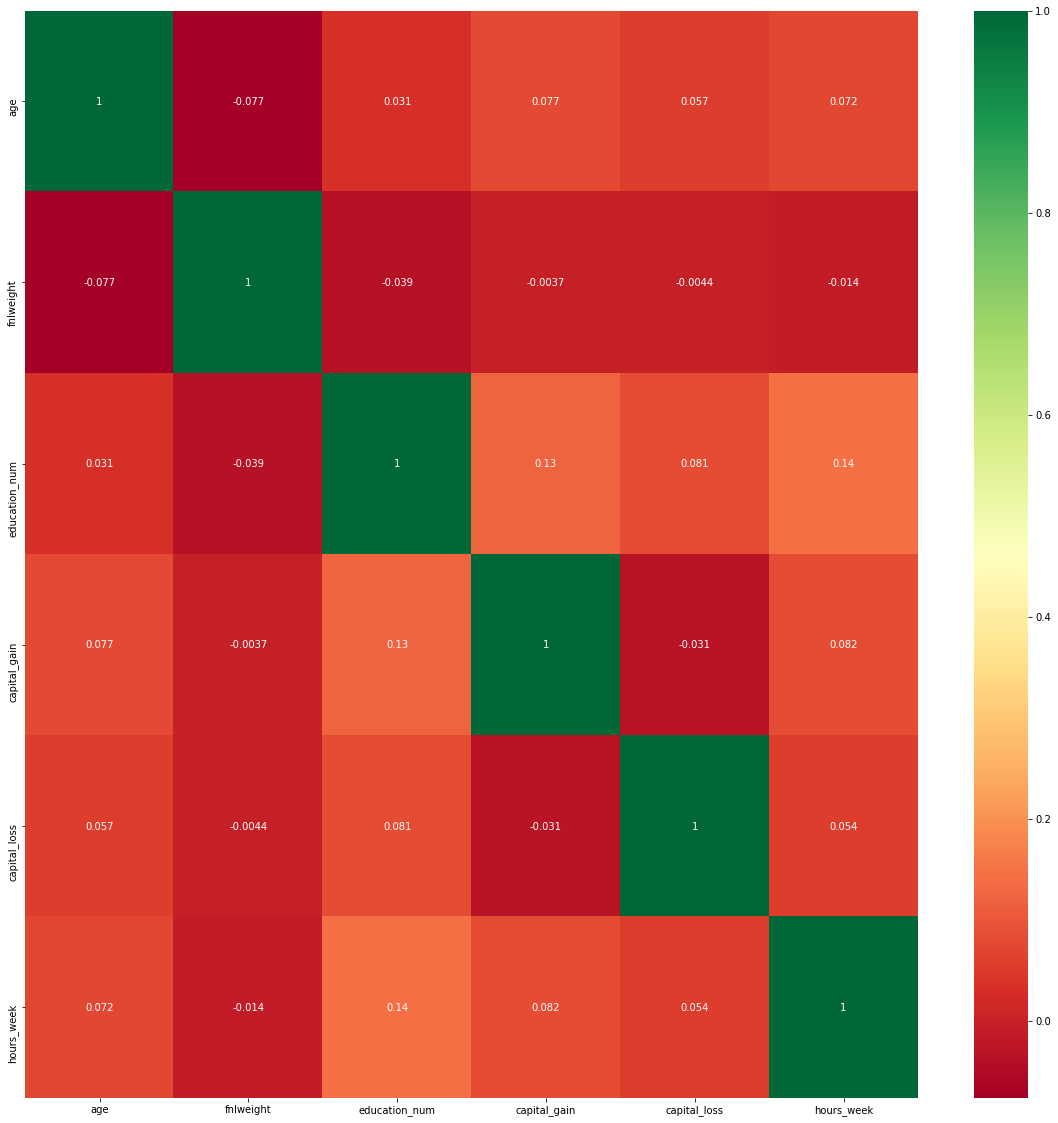

In [18]:
#correlation
x = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [19]:
#['age','workclass','fnlweight','education','education_num','marital_status','occupation',
#'relationship','race','sex','capital_gain','capital_loss','hours_week','native_country','class']

df_cat = df[['workclass','education','marital_status','occupation',
'relationship','race','sex','native_country']]
df_cat2 = pd.get_dummies(df_cat, columns=['workclass','education','marital_status','occupation',
'relationship','race','sex','native_country'], drop_first=False)
df_cat2.reset_index(drop=True, inplace=True)

In [20]:
scaler = preprocessing.MinMaxScaler()
to_scale_df = df[['age','fnlweight','education_num','capital_loss','hours_week']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['age','fnlweight','education_num','capital_loss','hours_week'])
scaled_df.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
df["class"] = df["class"].astype('category')
#cleanup_nums = {"class":{">50K": 1, "<=50K": 0}}
#df.replace(cleanup_nums, inplace=True)
df["class"] = df["class"].cat.codes
df['class'].reset_index(drop=True, inplace=True)
df['class'].head()

In [40]:
#combine data
df_new = pd.concat([scaled_df, df_cat2,df['class']], axis=1)
df_new.shape

(48842, 108)

In [44]:
#data split
X = df_new.drop('class', axis=1)
y = df_new[['class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

KNN: 0.754267 (0.058620)
CART: 0.693541 (0.044505)
RF: 0.758772 (0.051437)
SGD: 0.766921 (0.033115)
GB: 0.782992 (0.063092)


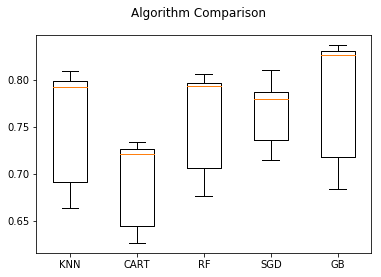

In [45]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new.values
X = array[:,0:107]
Y = array[:,107]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7884973321752078

In [48]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["0", "1"],
    index=["0", "1"]
)

,0,1
0,11512,744
1,2665,1197


In [52]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = df_new.values
X = array[:,0:107]
Y = array[:,107]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(list(zip(model.feature_importances_,df_new.columns.tolist())))
print( )

[(0.21550203721117006, 'age'), (0.2705680898730306, 'fnlweight'), (0.021291522600178327, 'education_num'), (0.019429257249934374, 'capital_loss'), (0.13395296602097756, 'hours_week'), (0.005021763702775128, 'workclass_ Federal-gov'), (0.005990746128185975, 'workclass_ Local-gov'), (0.001219779286581996, 'workclass_ NaN'), (5.6581646743448464e-06, 'workclass_ Never-worked'), (0.009812028415649692, 'workclass_ Private'), (0.004918838137502865, 'workclass_ Self-emp-inc'), (0.007004849581972637, 'workclass_ Self-emp-not-inc'), (0.005403549228925238, 'workclass_ State-gov'), (0.0001633392737195001, 'workclass_ Without-pay'), (0.002069969827937914, 'education_ 10th'), (0.0024671672283387456, 'education_ 11th'), (0.001593820955966004, 'education_ 12th'), (0.0006208982006482571, 'education_ 1st-4th'), (0.0009172667463852926, 'education_ 5th-6th'), (0.0018837356320913529, 'education_ 7th-8th'), (0.0016660615630301266, 'education_ 9th'), (0.002858309849715894, 'education_ Assoc-acdm'), (0.002961

In [53]:
df_new2 = df_new[['age','fnlweight','education_num','capital_loss','class']]

In [54]:
#data split
X = df_new2.drop('class', axis=1)
y = df_new2[['class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

KNN: 0.734019 (0.035151)
CART: 0.674582 (0.027180)
RF: 0.707976 (0.031149)
SGD: 0.759674 (0.003926)
GB: 0.768682 (0.028568)


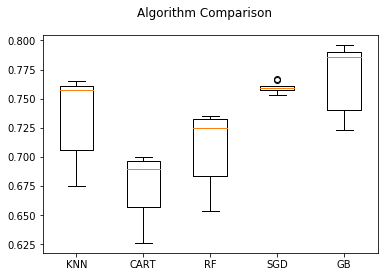

In [56]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new2.values
X = array[:,0:4]
Y = array[:,4]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7759027174587417

In [58]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["0", "1"],
    index=["0", "1"]
)

,0,1
0,11969,287
1,3325,537
